# k-means clustering(unsupervised)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.choice([1,2,3,4,5,6,7,8],3)      # choose any 3 values from a given list and can be repetitve

array([4, 5, 6])

In [9]:
m1, cov1=[9,8],[[1.5,2],[1,2]]
m2, cov2=[5,13],[[2.5,-1.5],[-1.5,1.5]]
m3, cov3=[3,7],[[0.25,0.5],[-0.1,0.5]]

data1=np.random.multivariate_normal(m1, cov1, 250)
data2=np.random.multivariate_normal(m2, cov2, 180)
data3=np.random.multivariate_normal(m3, cov3, 100)

X=np.vstack((data1,data2,data3))
np.random.shuffle(X)
X.shape


C:\Users\deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
C:\Users\deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(530, 2)

In [11]:
def kmeans(X,k,maxIters=100):
    m=X.shape[0]
    centroids=X[np.random.choice(np.arange(m),k)]
    
    for i in range(maxIters):
        C=[]
        for x in X:
            distances=[]
            for c in centroids:
                d=np.dot(x-c, x-c)
                distances.append(d)
            ci=np.argmin(distances) 
            C.append(ci)
        C=np.asarray(C) #asarray is used to convert list into numpy array as C is declared list before so to convert it into numpy arrayvwe use asarray
        centroids= [X[C==ci].mean(axis=0) for ci in range(k) ]
        
    return np.asarray(centroids),C
        #C=[np.argmin([np.dot(x-c,x-c) for c in centroids]) for x in X]  #  argmin gives index of the centroid(0 or 1 or 2) with which it has minimum distance

In [12]:
centroids, C=kmeans(X, k=3)
print(centroids)
print(C.shape)

[[ 8.9036813   7.94291837]
 [ 4.63357749 13.23982628]
 [ 3.01647524  7.12095466]]
(530,)


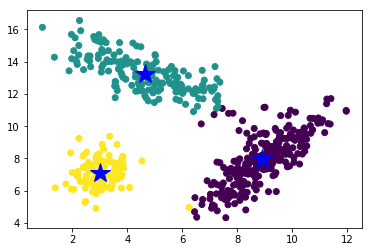

In [15]:
plt.scatter(X[:,0],X[:,-1], c=C)
plt.plot(centroids[:,0], centroids[:,-1], 'b*', markersize=20)
plt.show()